# Applied ML Assignment 1
## Submission by Akhil S - 2021MT12054
#### (This notebook along with it's PDF version can be found in this [Github Repo](https://github.com/Akhilsudh/BITS-Assignment/tree/master/Semester%202/Applied%20Machine%20Learning))
---
# Heart Attack Analaysis
## Introduction
 A heart attack occurs when an artery supplying your heart with blood and oxygen becomes blocked. A blood clot can form and block your arteries, causing a heart attack. This Heart Attack Analysis helps to understand the chance of attack occurrence in persons based on varied health conditions.

## Dataset
The dataset is `Heart_Attack_Analysis_Data.csv`. It has been uploaded to elearn. 
This dataset contains data about some hundreds of patients mentioning: 
- Age 
- Sex
- Exercise Include Angina(1=YES, 0=NO) 
- CP_Type (Chest Pain) (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) 
- ECG Results
- Blood Pressure 
- Cholesterol 
- Blood Sugar 
- Family History (Number of persons affected in the family) 
- Maximum Heart Rate 
- Target (0 = LESS CHANCE , 1 = MORE CHANCE)

## Aim
- Building a Predictive Model using Naïve Bayesian Approach (Which features decide heart attack?)
- Comment on the performance of this model using AUC-ROC, Precision, Recall, F_score, Accuracy

You need to 
1. Preprocess the data to enhance quality
2. Carry out descriptive summarization of data and make observations
3. Identify relevant, irrelevant attributes for building model. 
4. Use data visualization tools and make observations
5. Carry out the chosen analytic task. Show results including intermediate results, as needed
6. Evaluate the solution

Following are some points for you to take note of, while doing the assignment in Jupyter Notebook:
- State all your assumptions clearly
- List all intermediate steps and learnings
- Mention your observations/findings

---

## Submission Plan

The following will be done in this notebook:
1. Verify the datatypes of the values given in the dataset and validate with the information given in the document.
2. Check for invalid values based on domain knowledge by checking if values are present in humanly possible ranges.
3. Figure out which columns are numeric and categorical based on the unique values each column has and based on information given in the assignment document.
4. Check for trends among numerical features and among categorical features to see if feature reduction can be done (via pairplots etc)
5. Check which numerical attributes are relevant and which are irrelevant and drop irrelevant ones.
6. Scale numerical attributes with a standard scaler.
7. Train a gnb **MODEL 1** where it is fit with data where only scaling is done to numerical data.
8. Check for outliers via boxplots and remove them with IQR method.
9. Train a gnb **MODEL 2** where it is fit with data where scaling is done to numerical data, and outliers are removed using the IQR method.
10. One hot encode categorical data.
11. Train a gnb **MODEL 3** where it is fit with data where scaling is done to numerical data, outliers are removed using the IQR method and one hot encoding is done to categorical data.

We will then **compare the accuracy, Precision, Recall, F-Score and AOC-ROC of three models trained**.


## My Submission
### Importing necessary packages

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sb
import warnings

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

### Viewing Data
Check the shape of the dataframe loaded into memory from the CSV file and see the datatypes used in the dataset given

In [142]:
df = pd.read_csv("./Heart_Attack_Analysis_Data.csv")
print("Dataframe Shape: {}".format(df.shape))
print("----------------------------------\n")
print("With following data types:\n")
df.info()
print("----------------------------------\n")
print("First 5 rows of Dataframe:")
df.head()
dfcp = df.copy()

Dataframe Shape: (303, 11)
----------------------------------

With following data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             303 non-null    int64
 1   Sex             303 non-null    int64
 2   CP_Type         303 non-null    int64
 3   BloodPressure   303 non-null    int64
 4   Cholestrol      303 non-null    int64
 5   BloodSugar      303 non-null    int64
 6   ECG             303 non-null    int64
 7   MaxHeartRate    303 non-null    int64
 8   ExerciseAngina  303 non-null    int64
 9   FamilyHistory   303 non-null    int64
 10  Target          303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB
----------------------------------

First 5 rows of Dataframe:


In [143]:
print("Stats on Dataframe:")
df.describe()

Stats on Dataframe:


,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.204620,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.096825,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.000000,1.000000


All columns are `integer` type and all columns have a value for all rows (303 not null), which means that all values are filled and there are no missing values.

### Data Preprocessing
#### Now to check certain columns with humanly possible ranges based on domain knowledge
The following are the assumed ranges for these columns:
1. 0 < Age <= 100 years
2. 90 <= BloodPressure <= 200
3. 60 <= MaxHeartRate <= 220

In [144]:
print("\nMinimum Age = {}".format(df["Age"].min()))
print("Maximum Age = {}".format(df["Age"].max()))

print("\nMinimum Blood Pressure = {}".format(df["BloodPressure"].min()))
print("Maximum Blood Pressure = {}".format(df["BloodPressure"].max()))

print("\nMinimum Heart Rate = {}".format(df["MaxHeartRate"].min()))
print("Maximum Heart Rate = {}".format(df["MaxHeartRate"].max()))


Minimum Age = 29
Maximum Age = 77

Minimum Blood Pressure = 94
Maximum Blood Pressure = 200

Minimum Heart Rate = 71
Maximum Heart Rate = 202


**All** of the mentioned columns have values within acceptable ranges.

#### Checking number of unique values for each column
`Column Name -> Unique Number count`

In [145]:
for column in list(df.columns):
    print("{} -> {}".format(column, df[column].value_counts().shape[0]))

Age -> 41
Sex -> 2
CP_Type -> 4
BloodPressure -> 49
Cholestrol -> 152
BloodSugar -> 2
ECG -> 3
MaxHeartRate -> 91
ExerciseAngina -> 2
FamilyHistory -> 6
Target -> 2


**Taking columns that have a maximum of 4 unique values (And based on information given in assignment document) as categorical and the rest as numeric:**

In [146]:
category_list = ["Sex", "CP_Type", "BloodSugar", "ECG", "ExerciseAngina"]
numeric_list = ["Age", "BloodPressure", "Cholestrol", "MaxHeartRate", "FamilyHistory"]

#### Checking for trends in numeric features through Pair Plots

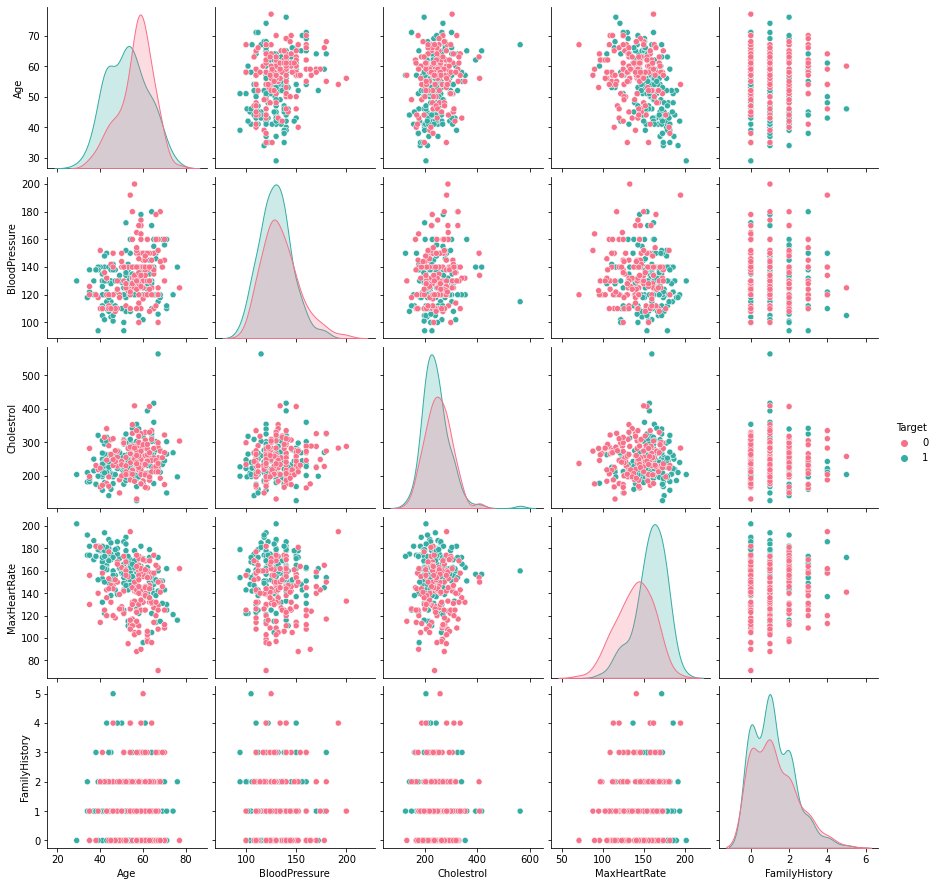

In [147]:
df_number = df.loc[:, numeric_list]
df_number["Target"] = df["Target"]
sb.pairplot(df_number, hue = "Target", palette="husl")
plt.show()

The pair plots do not show any particular trends that can be used to reduce numerical features. We do see a slight relation between age and max heart rate but the plot is scattered enough to not relate them together.

#### Checking frequncy of each categorical feature wrt target column to check how well it is balanced 

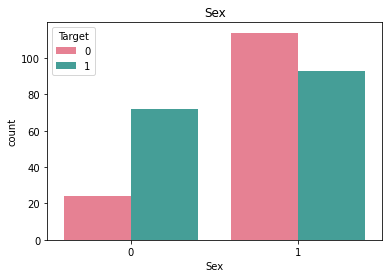

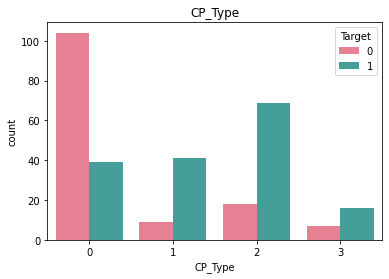

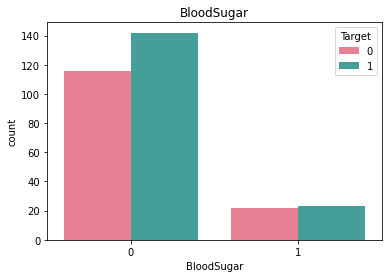

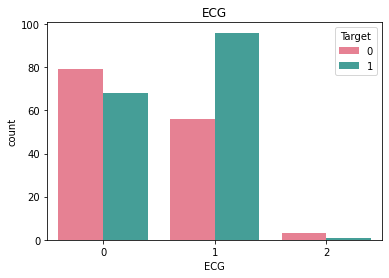

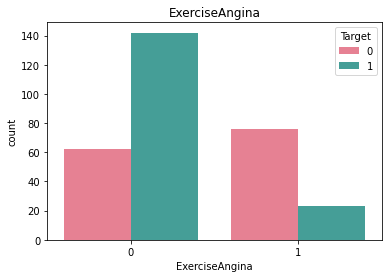

In [148]:
df_category = df.loc[:, category_list]
df_category["Target"] = df["Target"]
for i in category_list:
    plt.figure()
    sb.countplot(x = i, data = df_category, hue = "Target", palette="husl")
    plt.title(i)

#### Here we see that there is very little rows that have ECG value = 2 and similarly very little rows for BloodSugar value = 1.

### Checking relevant numerical features

To do this we shall use the `f_oneway` function from `scipy.stats`. This function performs [one-way ANOVA(Analysis of Variance)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to test the null hypothesis that two groups of data have the same population mean. 

A feature is only relevant if the sample from a particular feature for a target category is statistically very different from another sample from the same feature for another target category.

#### Checking relevance of Age

In [149]:
result = stats.f_oneway(df["Age"][df["Target"] == 0],
               df["Age"][df["Target"] == 1])
result.pvalue

7.524801303442268e-05

The pvalue is < 0.05. This shows that the means of the two distributions (One with Age wrt less chance of getting heart attack and the other with more chance of getting heart attack) are significantly different statistically, hence **Age is relevant**

#### Checking relevance of BloodPressure

In [150]:
result = stats.f_oneway(df["BloodPressure"][df["Target"] == 0],
               df["BloodPressure"][df["Target"] == 1])
result.pvalue 

0.011546059200233376

The pvalue is < 0.05. This shows that the means of the two distributions (One with BloodPressure wrt less chance of getting heart attack and the other with more chance of getting heart attack) are significantly different statistically, hence **BloodPressure is relevant**

#### Checking relevance of Cholestrol

In [151]:
result = stats.f_oneway(df["Cholestrol"][df["Target"] == 0],
               df["Cholestrol"][df["Target"] == 1])
result.pvalue

0.1387903269560108

The pvalue is > 0.05. This shows that the means of the two distributions (One with Cholestrol wrt less chance of getting heart attack and the other with more chance of getting heart attack) are not significantly different statistically, hence **Cholestrol is irrelevant**

#### Checking relevance of MaxHeartRate

In [152]:
result = stats.f_oneway(df["MaxHeartRate"][df["Target"] == 0],
               df["MaxHeartRate"][df["Target"] == 1])
result.pvalue

1.6973376386560805e-14

The pvalue is < 0.05. This shows that the means of the two distributions (One with MaxHeartRate wrt less chance of getting heart attack and the other with more chance of getting heart attack) are significantly different statistically, hence **MaxHeartRate is relevant**

#### Checking relevance of FamilyHistory

In [153]:
result = stats.f_oneway(df["FamilyHistory"][df["Target"] == 0],
               df["FamilyHistory"][df["Target"] == 1])
result.pvalue

0.6172651404419242

The pvalue is > 0.05. This shows that the means of the two distributions (One with FamilyHistory wrt less chance of getting heart attack and the other with more chance of getting heart attack) are not significantly different statistically, hence **FamilyHistory is irrelevant**

#### Dropping the irrelevant features

In [154]:
df.drop(["Cholestrol"], axis = 1, inplace= True)
df.drop(["FamilyHistory"], axis = 1, inplace= True)
numeric_list.remove("Cholestrol")
numeric_list.remove("FamilyHistory")
df.head()

,Age,Sex,CP_Type,BloodPressure,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,Target
0,63,1,3,145,1,0,150,0,1
1,37,1,2,130,0,1,187,0,1
2,41,0,1,130,0,0,172,0,1
3,56,1,1,120,0,1,178,0,1
4,57,0,0,120,0,1,163,1,1


#### Scaling the numeric attributes in the dataframe with a standard scaler

In [155]:
scaler = StandardScaler()
df[numeric_list] = scaler.fit_transform(df[numeric_list])
df.head()

,Age,Sex,CP_Type,BloodPressure,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,Target
0,0.952197,1,3,0.763956,1,0,0.015443,0,1
1,-1.915313,1,2,-0.092738,0,1,1.633471,0,1
2,-1.474158,0,1,-0.092738,0,0,0.977514,0,1
3,0.180175,1,1,-0.663867,0,1,1.239897,0,1
4,0.290464,0,0,-0.663867,0,1,0.583939,1,1


---
### Investigating dataset for outliers
#### Analyzing the boxplot for scaled numeric attributes to check for outliers

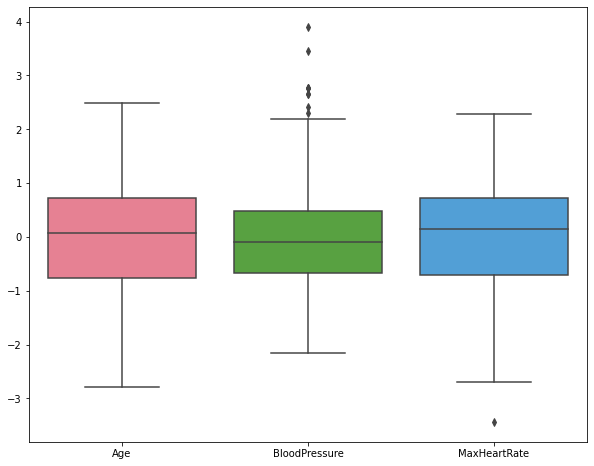


----------------------------------



In [156]:
plt.figure(figsize=(10,8))
sb.boxplot(data=df[numeric_list], palette="husl")
plt.show()
print("\n----------------------------------\n")

We can see some outlier values for blood pressure and max heart rate. we can drop these outliers using the IQR method.

#### Dropping outliers with IQR method 
Going with $+/- 1.6 \times IQR$ to accomodate data upto $3\sigma$ from the mean to remove the outliers.

In [157]:
print("Original shape of dataframe: {}".format(df.shape))
for i in numeric_list:
    Q25 = np.percentile(df.loc[:, i],25)
    Q75 = np.percentile(df.loc[:, i],75)
    IQR = Q75 - Q25
    upper_bound = np.where(df.loc[:, i] >= (Q75 + 3*IQR))
    lower_bound = np.where(df.loc[:, i] <= (Q25 - 3*IQR))
    df.drop(upper_bound[0], inplace = True)
    df.drop(lower_bound[0], inplace = True)
print("Shape of dataframe after dropping outliers: {}".format(df.shape))

Original shape of dataframe: (303, 9)
Shape of dataframe after dropping outliers: (302, 9)


---
### Finding correlation between features through a heatmap

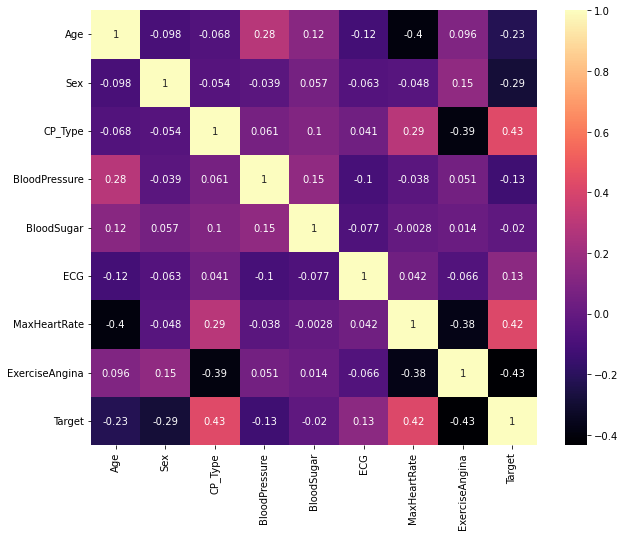


----------------------------------

The number of correlating features: 0
The correlating features are: set()

----------------------------------



In [158]:
corr_features = set()
corr_matrix = df.corr()
plt.figure(figsize = (10,8))
sb.heatmap(corr_matrix, annot = True, cmap="magma")
plt.show()

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
print("\n----------------------------------\n")
print("The number of correlating features: {}".format(len(corr_features)))
print("The correlating features are: {}".format(corr_features))
print("\n----------------------------------\n")

None of the features seem to correlate with each other and hence we cannot do feature reduction

## Model 1
### Training a Guassian Naive Bayes model with the data (With scaling done to numerical features, outliers removed and one hot encoding categorical features)

#### Original dataframe:

In [159]:
dfnb = df.copy()
dfnb.head()

,Age,Sex,CP_Type,BloodPressure,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,Target
0,0.952197,1,3,0.763956,1,0,0.015443,0,1
1,-1.915313,1,2,-0.092738,0,1,1.633471,0,1
2,-1.474158,0,1,-0.092738,0,0,0.977514,0,1
3,0.180175,1,1,-0.663867,0,1,1.239897,0,1
4,0.290464,0,0,-0.663867,0,1,0.583939,1,1


#### One hot encoded dataframe:

In [160]:
dfnb = pd.get_dummies(dfnb, columns = category_list, drop_first = True)
dfnb.head()

,Age,BloodPressure,MaxHeartRate,Target,Sex_1,CP_Type_1,CP_Type_2,CP_Type_3,BloodSugar_1,ECG_1,ECG_2,ExerciseAngina_1
0,0.952197,0.763956,0.015443,1,1,0,0,1,1,0,0,0
1,-1.915313,-0.092738,1.633471,1,1,0,1,0,0,1,0,0
2,-1.474158,-0.092738,0.977514,1,0,1,0,0,0,0,0,0
3,0.180175,-0.663867,1.239897,1,1,1,0,0,0,1,0,0
4,0.290464,-0.663867,0.583939,1,0,0,0,0,0,1,0,1


In [161]:
X = dfnb.drop(["Target"], axis = 1)
y = dfnb[["Target"]]
# X = df.drop(["Target"], axis = 1)
# y = df[["Target"]]

#### Split X and y to training and test data

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (241, 11)
y_train: (241, 1)
X_test: (61, 11)
y_test: (61, 1)


### Prediction Analysis:
The following is the analysis for a naive bayes model that was trained with the following done on the data:
1. One hot encode categorical features
2. Scale the numerical features with a standard scaler
3. Remove outliers 1.6 times IQR below and above the Q1 and Q3 respectively
4. Split the data into training and test data with 20% test data

Guassian NB Results:
----------------------------------



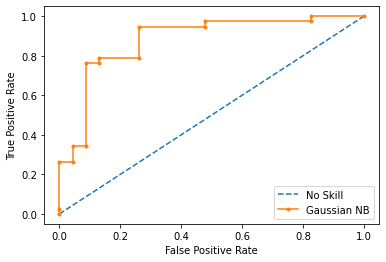

----------------------------------

AUC-ROC Score: 88.10%
Precision Score: 83.78%
Recall Score: 81.58%
F Score: 82.67%
Accuracy Score: 78.69%

----------------------------------

Confusion matrix:


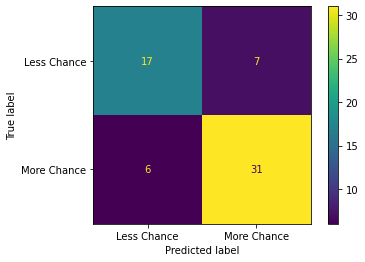

In [163]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Guassian NB Results:")
print("----------------------------------\n")
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

y_probs = gnb.predict_proba(X_test)
gnb_probs = y_probs[:, 1]
gnb_fpr, gnb_tpr, temp = roc_curve(y_test, gnb_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print("----------------------------------\n")
print("AUC-ROC Score: {0:0.2f}%".format(roc_auc_score(y_test, gnb_probs) * 100))
print("Precision Score: {0:0.2f}%".format(precision_score(y_test,y_pred) * 100))
print("Recall Score: {0:0.2f}%".format(recall_score(y_test,y_pred) * 100))
print("F Score: {0:0.2f}%".format(f1_score(y_test,y_pred) * 100))
print("Accuracy Score: {0:0.2f}%".format(accuracy_score(y_test,y_pred) * 100))
print("\n----------------------------------\n")
print("Confusion matrix:")
cm = confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm,display_labels =["Less Chance","More Chance"]).plot()
plt.show()

In [164]:
# X = dfcp.drop(["Target"], axis = 1)
# y = dfcp[["Target"]]
X = df.drop(["Target"], axis = 1)
y = df[["Target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (241, 8)
y_train: (241, 1)
X_test: (61, 8)
y_test: (61, 1)


Logistic Regression Results:
----------------------------------



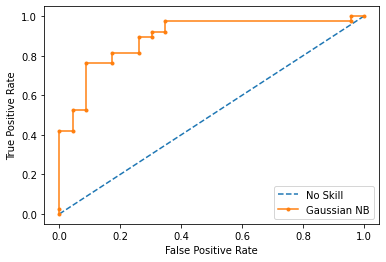

----------------------------------

AUC-ROC Score: 89.36%
Precision Score: 88.57%
Recall Score: 81.58%
F Score: 84.93%
Accuracy Score: 81.97%

----------------------------------

Confusion matrix:


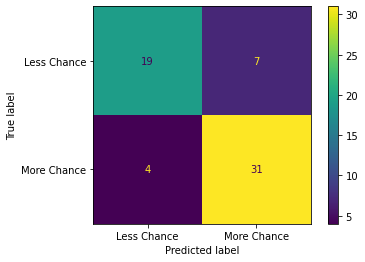

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

logreg = LogisticRegression(solver='newton-cg', penalty='l2', C=1.0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)
# model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



print("Logistic Regression Results:")
print("----------------------------------\n")
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

y_probs = logreg.predict_proba(X_test)
gnb_probs = y_probs[:, 1]
gnb_fpr, gnb_tpr, temp = roc_curve(y_test, gnb_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print("----------------------------------\n")
print("AUC-ROC Score: {0:0.2f}%".format(roc_auc_score(y_test, gnb_probs) * 100))
print("Precision Score: {0:0.2f}%".format(precision_score(y_test,y_pred) * 100))
print("Recall Score: {0:0.2f}%".format(recall_score(y_test,y_pred) * 100))
print("F Score: {0:0.2f}%".format(f1_score(y_test,y_pred) * 100))
print("Accuracy Score: {0:0.2f}%".format(accuracy_score(y_test,y_pred) * 100))
print("\n----------------------------------\n")
print("Confusion matrix:")
cm = confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm,display_labels =["Less Chance","More Chance"]).plot()
plt.show()

Decision Tree Results:
----------------------------------



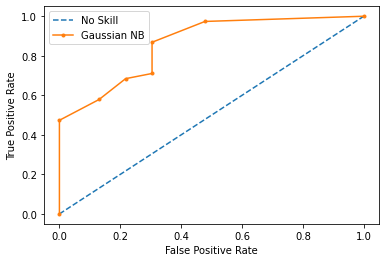

----------------------------------

AUC-ROC Score: 85.93%
Precision Score: 83.87%
Recall Score: 68.42%
F Score: 75.36%
Accuracy Score: 72.13%

----------------------------------

Confusion matrix:


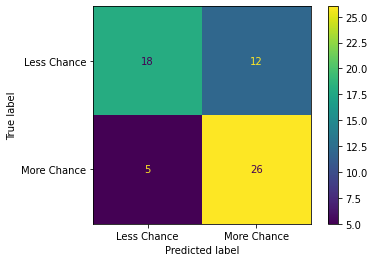

In [166]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=4,max_depth=3, min_samples_leaf=10)   
clf_model.fit(X_train,y_train)
y_pred = clf_model.predict(X_test)

print("Decision Tree Results:")
print("----------------------------------\n")
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

y_probs = clf_model.predict_proba(X_test)
gnb_probs = y_probs[:, 1]
gnb_fpr, gnb_tpr, temp = roc_curve(y_test, gnb_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print("----------------------------------\n")
print("AUC-ROC Score: {0:0.2f}%".format(roc_auc_score(y_test, gnb_probs) * 100))
print("Precision Score: {0:0.2f}%".format(precision_score(y_test,y_pred) * 100))
print("Recall Score: {0:0.2f}%".format(recall_score(y_test,y_pred) * 100))
print("F Score: {0:0.2f}%".format(f1_score(y_test,y_pred) * 100))
print("Accuracy Score: {0:0.2f}%".format(accuracy_score(y_test,y_pred) * 100))
print("\n----------------------------------\n")
print("Confusion matrix:")
cm = confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm,display_labels =["Less Chance","More Chance"]).plot()
plt.show()

KNN Results:
----------------------------------



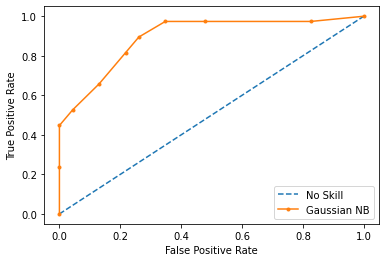

----------------------------------

AUC-ROC Score: 89.24%
Precision Score: 86.11%
Recall Score: 81.58%
F Score: 83.78%
Accuracy Score: 80.33%

----------------------------------

Confusion matrix:


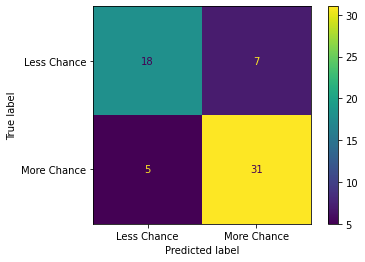

In [167]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm='auto', leaf_size = 1, p=1 , n_neighbors=9)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("KNN Results:")
print("----------------------------------\n")
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

y_probs = model.predict_proba(X_test)
gnb_probs = y_probs[:, 1]
gnb_fpr, gnb_tpr, temp = roc_curve(y_test, gnb_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print("----------------------------------\n")
print("AUC-ROC Score: {0:0.2f}%".format(roc_auc_score(y_test, gnb_probs) * 100))
print("Precision Score: {0:0.2f}%".format(precision_score(y_test,y_pred) * 100))
print("Recall Score: {0:0.2f}%".format(recall_score(y_test,y_pred) * 100))
print("F Score: {0:0.2f}%".format(f1_score(y_test,y_pred) * 100))
print("Accuracy Score: {0:0.2f}%".format(accuracy_score(y_test,y_pred) * 100))
print("\n----------------------------------\n")
print("Confusion matrix:")
cm = confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm,display_labels =["Less Chance","More Chance"]).plot()
plt.show()

In [168]:
# import pandas as pd
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import GridSearchCV





# estimator_KNN = KNeighborsClassifier(algorithm='auto')
# parameters_KNN = {
#     'n_neighbors': (1,10, 1),
#     'leaf_size': (20,40,1),
#     'p': (1,2),
#     'weights': ('uniform', 'distance'),
#     'metric': ('minkowski', 'chebyshev'),
                   
# # with GridSearch
# grid_search_KNN = GridSearchCV(estimator=estimator_KNN,param_grid=parameters_KNN,scoring = 'accuracy',n_jobs = -1,cv = 5)
# grid_search_KNN.fit(X_train, y_train) 
# print('Best Score - KNN:', grid_search_KNN.best_score_ )

# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# knn_2 = KNeighborsClassifier()
# clf = GridSearchCV(knn_2, hyperparameters, cv=10)

# best_model = clf.fit(X_train,y_train)
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


# Comparing the results of the three models:

From the results obtained from above prediction analysis, we can tabulate them together below:

| Model/Metric | AUC-ROC | Precision | Recall | F_Score | Accuracy |
| ------------ | ------- | --------- | ------ | ------- | -------- |
| Model 1      | 85.71%  | 82.50%    | 82.50% | 82.05%  | 77.05%   |
| Model 2      | 85.92%  | 84.21%    | 80.00% | 82.05%  | 76.27%   |
| Model 3      | 90.53%  | 85.00%    | 85.00% | 85.00%  | 79.66%   |

This shows that the **maximum Accuracy is obtained when scaling is applied on numerical attributes with outliers being dropped and one hot encoding is done to the categorical features (Model 3)**.

We can also see that **Model 2 has lesser accuracy but higher Precision than Model 1**. This shows that Model 1 is overfitted.

We know that:

$Precision = \frac{True Positive}{True Positive + False Positive}$

and

$Recall = \frac{True Positive}{True Positive + False Negative}$

Upon viewing the confusion matrix for each model it is clear that **lesser false negatives and false positives are recorded in Model 3** in comparison to Model 1 and Model 2 which attributes to the **better Precision and Recall scores in Model 3**.

Finally, we know that:

$F = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

This goes to show why Model 3 has better F score since its recall and precision is better than the other two models.


---
#### This notebook along with it's PDF version can be found in this [Github Repo](https://github.com/Akhilsudh/BITS-Assignment/tree/master/Semester%202/Applied%20Machine%20Learning)